# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business task as a data problem involves identifying the key objectives that influence the prices of used cars. This requires conducting  data analysis to understand the relationships between various featues such as mileage, brand, age, condition, and features of the car with its price. The data task involves developing predictive models to quantify the impact of these variables on car prices, which can guide the used car dealership in pricing strategies and marketing decisions. This also involves identifying segments of customers based on their preferences and willingness to pay for specific car characteristics.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The steps that needs to be taken here is to:

Collect Initial Data : Gather the data with every element on a car

Describe Data: Next we to display what the data tells such as the importance it has

Explore Data: We need to see what the data looks likes with certain catagories

Verify Data Quality: We need to check if the data is accurate and matches well with the quality

This will allow us to understand the data of the impact it has on the car prices. 


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

For Data preperation we need to select which data is the most important, then we need to clean the data which has null values. Next we need to construct data, integrate data, format data and create a dataset. That is how we do data preparation. 

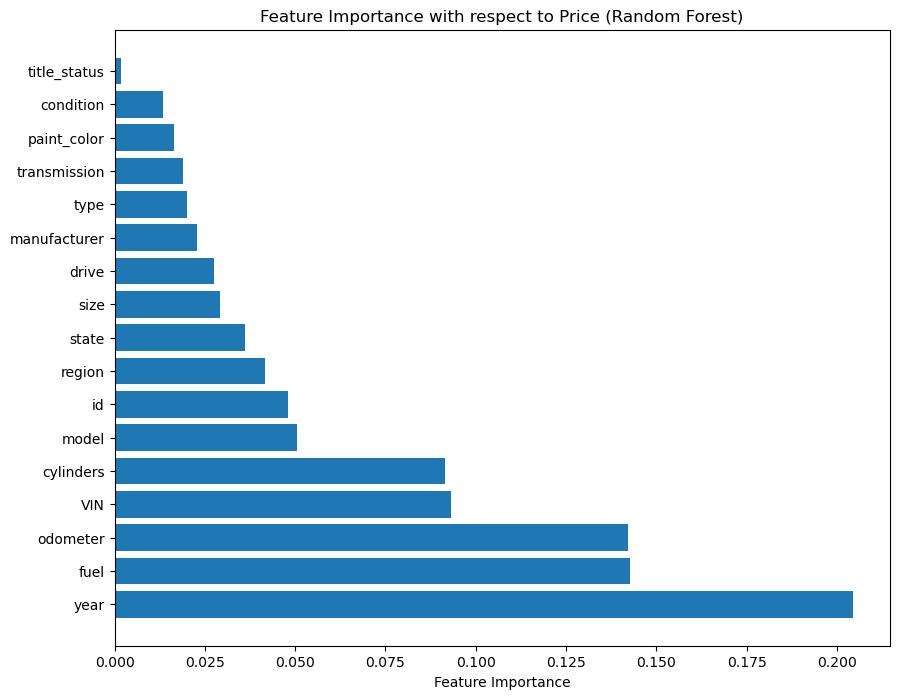

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split


data = pd.read_csv("data/vehicles.csv")

data.dropna(inplace=True)

# Converts non-numeric columns to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(columns=['price'])
y = data['price']

sample_size = 10000
sampled_data = data.sample(n=sample_size, random_state=42)

X_sampled = sampled_data.drop(columns=['price'])
y_sampled = sampled_data['price']

# Create a random forest regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_sampled, y_sampled)

importances = forest.feature_importances_

feature_names = X.columns

sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance with respect to Price (Random Forest)')
plt.show()


The data shows that the year as the high factor in feature importance, using random forest regressor. 

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

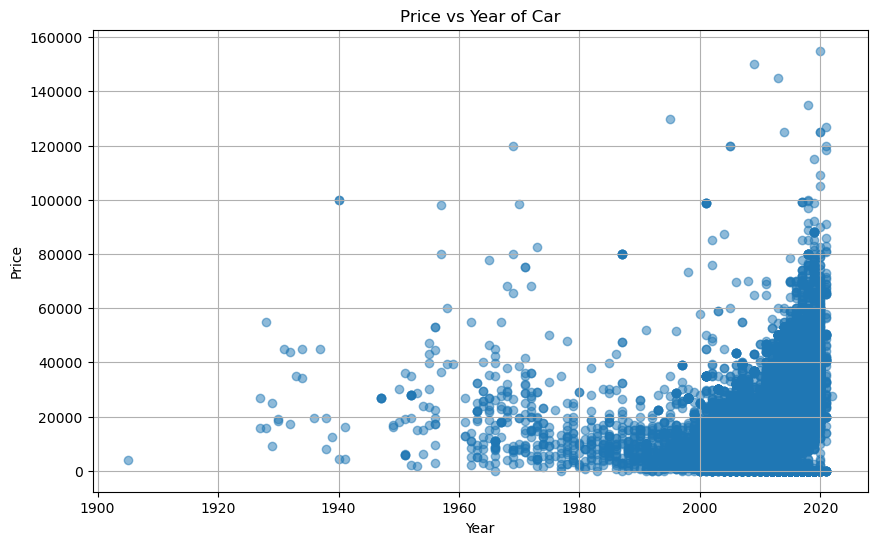

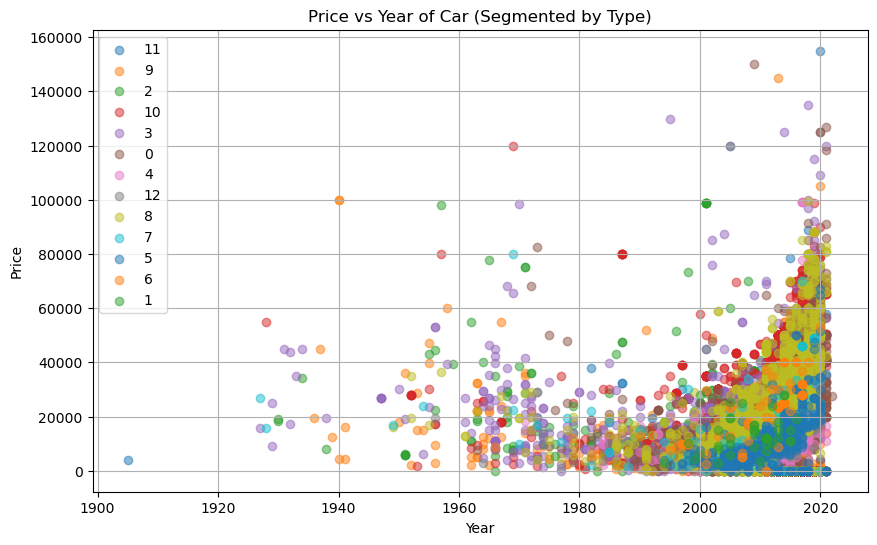

Coefficient for 'year': 477.44825860766935


In [36]:
# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(columns=['price'])
y = data['price']

#Creates a new feature for the age of the car
current_year = pd.Timestamp.now().year
X['age'] = current_year - X['year']

plt.figure(figsize=(10, 6))
plt.scatter(X['year'], y, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year of Car')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for car_type in X['type'].unique():
    plt.scatter(X[X['type'] == car_type]['year'], y[X['type'] == car_type], label=car_type, alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year of Car (Segmented by Type)')
plt.legend()
plt.grid(True)
plt.show()


model = LinearRegression()
model.fit(X[['year']], y)

# Get coefficients
print("Coefficient for 'year':", model.coef_[0])



There are two graphs Price vs Year of Car, one is the regular Price vs Year of Car graph the other on the Prices Vs Year of Car (segmented by type) graph where type 5 has the lowest prices amongst the newer cars. The reason I chose type because a lot of car buyer makes decision with values based on the type of the car. 

Three regressions to find RMSE and RAE with STD buffer, using 5 fold cross validation. The coefficient shows that for every additional year of the car's manufacturing age, the price of the car increases by $477.45.

In [37]:


# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(columns=['price'])
y = data['price']

#Time series data that shows the age of the car
current_year = pd.Timestamp.now().year
X['age'] = current_year - X['year']

# Models are defined
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Does cross-validation for each model using for loop
for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model) 
    train_rmse_list = []
    test_rmse_list = []
    train_mae_list = []
    test_mae_list = []
    for _ in range(5):  # 5-fold cross-validation
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        pipeline.fit(X_train, y_train)
        train_rmse = np.sqrt(((pipeline.predict(X_train) - y_train) ** 2).mean())
        test_rmse = np.sqrt(((pipeline.predict(X_test) - y_test) ** 2).mean())
        train_mae = np.abs(pipeline.predict(X_train) - y_train).mean()
        test_mae = np.abs(pipeline.predict(X_test) - y_test).mean()
        train_rmse_list.append(train_rmse)
        test_rmse_list.append(test_rmse)
        train_mae_list.append(train_mae)
        test_mae_list.append(test_mae)
    mean_train_rmse = np.mean(train_rmse_list)
    mean_test_rmse = np.mean(test_rmse_list)
    std_train_rmse = np.std(train_rmse_list)
    std_test_rmse = np.std(test_rmse_list)
    mean_train_mae = np.mean(train_mae_list)
    mean_test_mae = np.mean(test_mae_list)
    std_train_mae = np.std(train_mae_list)
    std_test_mae = np.std(test_mae_list)
    print(f"{name}: Mean Train RMSE: {mean_train_rmse:.2f} ± {std_train_rmse:.2f}, Mean Test RMSE: {mean_test_rmse:.2f} ± {std_test_rmse:.2f}")
    print(f"       Mean Train MAE: {mean_train_mae:.2f} ± {std_train_mae:.2f}, Mean Test MAE: {mean_test_mae:.2f} ± {std_test_mae:.2f}")


Linear Regression: Mean Train RMSE: 10975.04 ± 0.00, Mean Test RMSE: 11980.09 ± 0.00
       Mean Train MAE: 7511.42 ± 0.00, Mean Test MAE: 7756.21 ± 0.00
Ridge Regression: Mean Train RMSE: 10975.07 ± 0.00, Mean Test RMSE: 11980.65 ± 0.00
       Mean Train MAE: 7508.91 ± 0.00, Mean Test MAE: 7753.40 ± 0.00
Random Forest Regression: Mean Train RMSE: 2083.79 ± 0.00, Mean Test RMSE: 6393.91 ± 0.00
       Mean Train MAE: 1045.21 ± 0.00, Mean Test MAE: 2905.19 ± 0.00


Here are the all the 3 regression with mean train and mean tests for both RMSE and MAE with the STD buffer which is 0. This shows based on RMSE and MAE with STD variations that Random Forest Regression is the best regression. 

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

It's clear that the year has the highest impact in terms of car prices, but it we broke it down to car type, we look at type 5 (notice those types are in number because they have been encoded). Since type 5 is the low range of prices for cars thay came out recently. Obviously, prices are much lower for the older cars as the graph shows the prices are lower. 

In this task it was understood that permuation importance takes a lot of time in order to know the importance it has on the prices, so I used Random forest importance as it was much faster to run on and produce the results needed. 

Random Forest regression is the best regession based on RMSE and MAE for both train and test. In terms of the year of the prices.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Here are the takeaways for the client to understand regarding prices of the cars:

Our analysis reveals that the year of manufacture has the most significant impact on car prices, with newer cars generally commanding higher prices.
When considering specific car types, we observed variations in pricing trends. Notably, cars of type 5, representing based on the prices vs year of the car(segmented by car type) it shows that years has a factor for prices, tend to have lower prices compared to other types.

Best performing model show that among the regression models evaluated, the Random Forest Regression model consistently outperformed others in predicting car prices, showing lower Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) on both training and test data.

I recommend to the clinet to adjust pricing strategies based on the age of the car. Older cars may be priced more competitively to attract customers, while newer models with higher prices can maximize profitability.
Consider segmenting inventory based on car type to tailor pricing strategies and marketing efforts to different customer segments effectively.

Also, I recommend continuous monitoring of market conditions and consumer preferences to apdapt pricing strategies accordingly. Frequent updates to the predictive models can guarantee accuracy and relevance over time.

In conclusion, our analysis provides valuable insights that can inform your decision making process and enhance the effectiveness of your inventory management and pricing strategies. 
